In [88]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
from matplotlib import pyplot as plt
from preprocessing import process_handwriting, data_import_handwriting
import numpy as np
from tensorflow.math import confusion_matrix


In [89]:
data_path = "./CS671-DLA-Assignment4-Data-2022/Handwriting_Data"
x_train, y_train, x_test, y_test = data_import_handwriting(data_path)
# print(x_train[3].shape)
x_max=np.nan
# x_train, x_max = padding_sequences(x_train)
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
# print(y_train)
# x_test = padding_sequences(x_test)


In [90]:
import matplotlib.pyplot as plt
# rand_idx = np.random.randint(0,344,(25,))
# plt.figure(figsize=(10,10))
# for i, idx in enumerate(rand_idx):
#     plt.subplot(5,5,i+1)
#     plt.plot(x_train[idx][:, 0], x_train[idx][:, 1])
# plt.tight_layout()
# plt.show()
# a, bA, chA, lA, tA
# 0-68, 69-135, 136-205, 206-273, 274-342

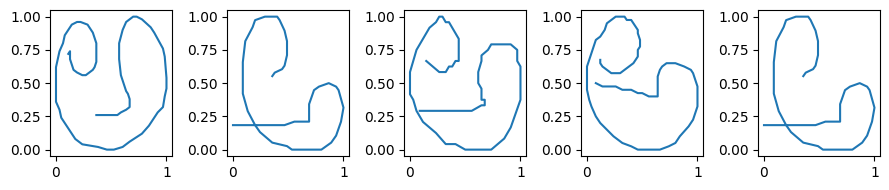

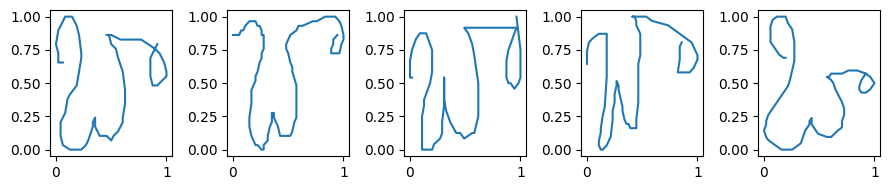

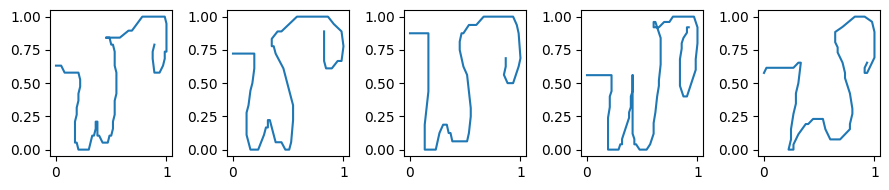

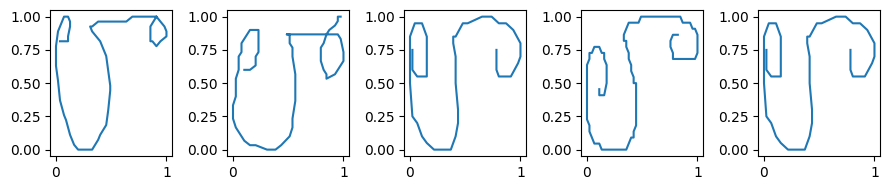

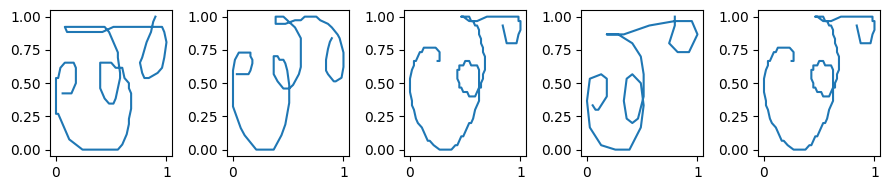

In [91]:
# rand_idx = np.random.randint(0,344,(25,))
rand_idx_a = np.random.randint(0, 68, (5,))
rand_idx_bA = np.random.randint(68, 135, (5,))
rand_idx_chA = np.random.randint(136, 205, (5,))
rand_idx_lA = np.random.randint(206, 273, (5,))
rand_idx_tA = np.random.randint(274, 342, (5,))
rand_idx = [rand_idx_a, rand_idx_bA, rand_idx_chA, rand_idx_lA, rand_idx_tA]

for idx_set in rand_idx:
    plt.figure(figsize=(9, 2))
    for i, idx in enumerate(idx_set):
        plt.subplot(1,5,i+1)
        plt.plot(x_train[idx][:, 0], x_train[idx][:, 1])
    plt.tight_layout()
    plt.show()
    


# Handwriting

## RNN-Architecture1

In [92]:
rnn = load_model("./models/handwriting_rnn1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 1,285
Trainable params: 1,285
Non-trainable params: 0
_________________________________________________________________


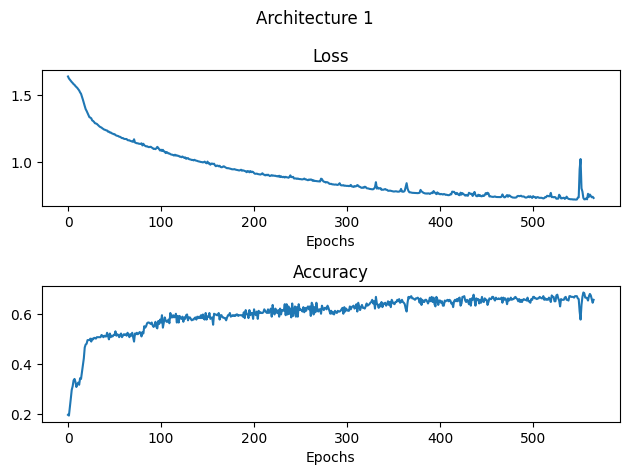

In [174]:
with open("./logs/hist_handrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 1")
plt.tight_layout()
plt.savefig("architecture1.png")

In [94]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [95]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 3ms/step
[[68  0  0  1  0]
 [ 0 15 46  4  2]
 [ 0 11 53  4  2]
 [ 0  1  5 30 32]
 [ 0  3  1  5 60]]


In [96]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.6589


[0.7275482416152954, 0.6588921546936035]

In [97]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6400


[0.6510818600654602, 0.6399999856948853]

In [98]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 3ms/step
[[20  0  0  0  0]
 [ 0  4 15  0  1]
 [ 0  4 16  0  0]
 [ 0  1  0  5 14]
 [ 0  0  0  1 19]]


## RNN-Architecture2

In [99]:
rnn = load_model("./models/handwriting_rnn2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 10)           130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 80        
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


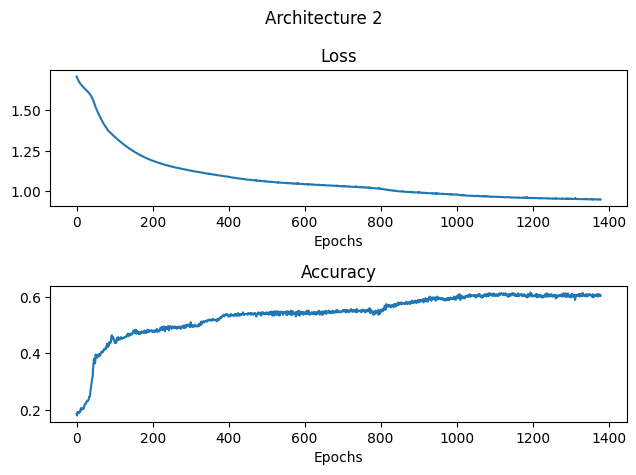

In [185]:
with open("./logs/hist_handrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 2")
plt.tight_layout()
plt.savefig("architecture2.png")

In [101]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [102]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 5ms/step
[[69  0  0  0  0]
 [ 0 44  7  1 15]
 [ 0 18 39  0 13]
 [ 0 26 24  0 18]
 [ 0  7  7  0 55]]


In [103]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 5ms/step - loss: 0.9473 - accuracy: 0.6035


[0.9473011493682861, 0.6034985184669495]

In [104]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 1.0016 - accuracy: 0.5400


[1.001598834991455, 0.5400000214576721]

In [105]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 5ms/step
[[20  0  0  0  0]
 [ 0 13  2  0  5]
 [ 0  7  6  0  7]
 [ 0  8  2  0 10]
 [ 0  4  1  0 15]]


## RNN-Architecture3

In [106]:
rnn = load_model("./models/handwriting_rnn3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 64)           4288      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 200)               6600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1005  

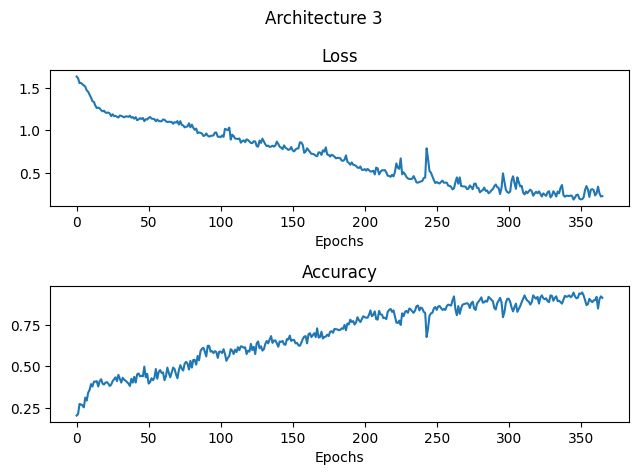

In [175]:
with open("./logs/hist_handrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 3")
plt.tight_layout()
plt.savefig("architecture3.png")

In [108]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [109]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 7ms/step
[[69  0  0  0  0]
 [ 0 57  9  1  0]
 [ 0  7 63  0  0]
 [ 0  0  0 67  1]
 [ 0  0  0  1 68]]


In [110]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 7ms/step - loss: 0.1625 - accuracy: 0.9446


[0.16245394945144653, 0.9446064233779907]

In [111]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 7ms/step - loss: 0.3484 - accuracy: 0.8700


[0.34838688373565674, 0.8700000047683716]

In [112]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 7ms/step
[[20  0  0  0  0]
 [ 0 13  5  1  1]
 [ 0  3 17  0  0]
 [ 0  0  0 19  1]
 [ 0  1  0  1 18]]


## LSTM-Architecture1

In [113]:
rnn = load_model("./models/handwriting_lstm1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                4480      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 4,645
Trainable params: 4,645
Non-trainable params: 0
_________________________________________________________________


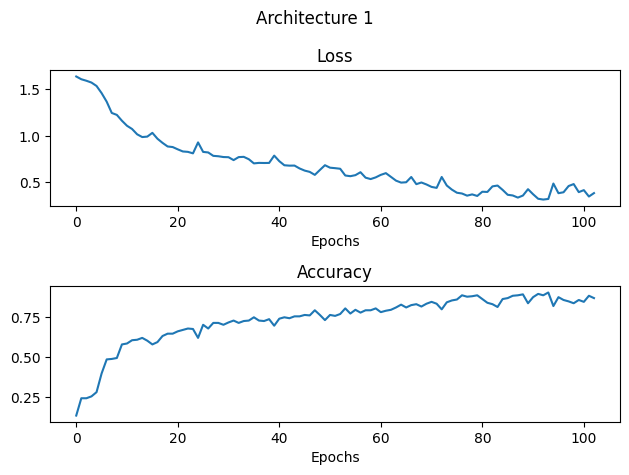

In [176]:
with open("./logs/hist_handlstm1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 1")
plt.tight_layout()
plt.savefig("lstm-architecture1.png")

In [115]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [116]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 6ms/step
[[69  0  0  0  0]
 [ 0 60  6  0  1]
 [ 0 17 53  0  0]
 [ 0  3  0 60  5]
 [ 0 10  1  0 58]]


In [117]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 6ms/step - loss: 0.3594 - accuracy: 0.8746


[0.35940515995025635, 0.8746355772018433]

In [118]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.8500


[0.31870925426483154, 0.8500000238418579]

In [119]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 5ms/step
[[20  0  0  0  0]
 [ 0 17  3  0  0]
 [ 0  4 16  0  0]
 [ 0  0  0 12  8]
 [ 0  0  0  0 20]]


## LSTM-Architecture2

In [120]:
rnn = load_model("./models/handwriting_lstm2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 10)           520       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 320       
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 870
Trainable params: 870
Non-trainable params:

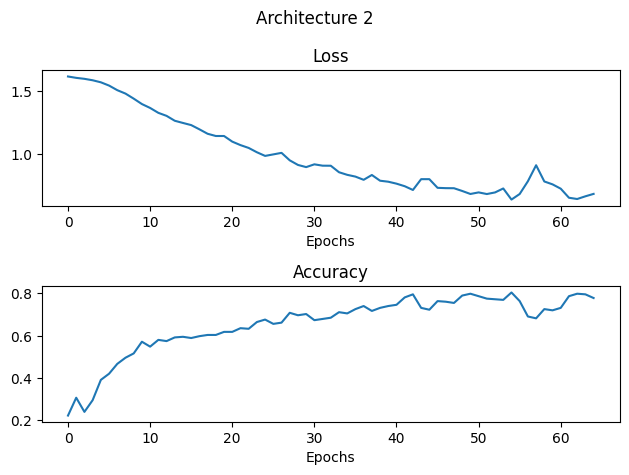

In [177]:
with open("./logs/hist_handlstm2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 2")
plt.tight_layout()
plt.savefig("lstm-architecture2.png")

In [122]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [123]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 8ms/step
[[63  0  0  6  0]
 [ 1 48  9  8  1]
 [ 0 17 48  2  3]
 [ 0  6  1 58  3]
 [ 0  3 13  4 49]]


In [124]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 15ms/step - loss: 0.6765 - accuracy: 0.7755


[0.676515519618988, 0.7755101919174194]

In [125]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 8ms/step - loss: 0.5742 - accuracy: 0.8300


[0.5742244720458984, 0.8299999833106995]

In [126]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 12ms/step
[[19  0  0  1  0]
 [ 0 17  1  2  0]
 [ 0  6 10  0  4]
 [ 0  0  0 20  0]
 [ 0  0  3  0 17]]


## LSTM-Architecture3

In [127]:
rnn = load_model("./models/handwriting_lstm3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 64)           17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 200)               6600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1005  

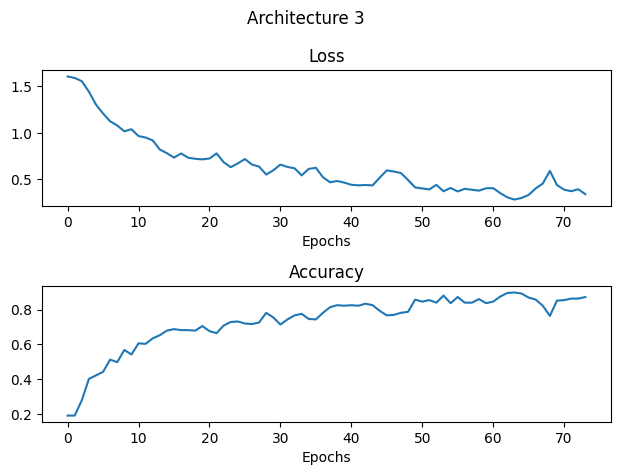

In [178]:
with open("./logs/hist_handlstm3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 3")
plt.tight_layout()
plt.savefig("lstm-architecture3.png")

In [129]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [130]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 16ms/step
[[69  0  0  0  0]
 [ 0 60  5  0  2]
 [ 0 10 56  0  4]
 [ 0 11  0 57  0]
 [ 0  2  1  0 66]]


In [131]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 16ms/step - loss: 0.3018 - accuracy: 0.8980


[0.3018144965171814, 0.8979591727256775]

In [132]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 14ms/step - loss: 0.2044 - accuracy: 0.9300


[0.20442567765712738, 0.9300000071525574]

In [133]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 14ms/step
[[20  0  0  0  0]
 [ 0 18  1  0  1]
 [ 0  4 16  0  0]
 [ 0  1  0 19  0]
 [ 0  0  0  0 20]]


# CV

In [134]:
from preprocessing import data_import_cv

In [135]:
x_train, y_train, x_test, y_test = data_import_cv("./CS671-DLA-Assignment4-Data-2022/CV_Data/")
mask_val=100_000.0
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=79)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=79)

y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [136]:
x_train_padded[0].shape

(79, 39)

## RNN-Architecture1

In [137]:
rnn = load_model("./models/cv_rnn1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6656      
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 6,981
Trainable params: 6,981
Non-trainable params: 0
_________________________________________________________________


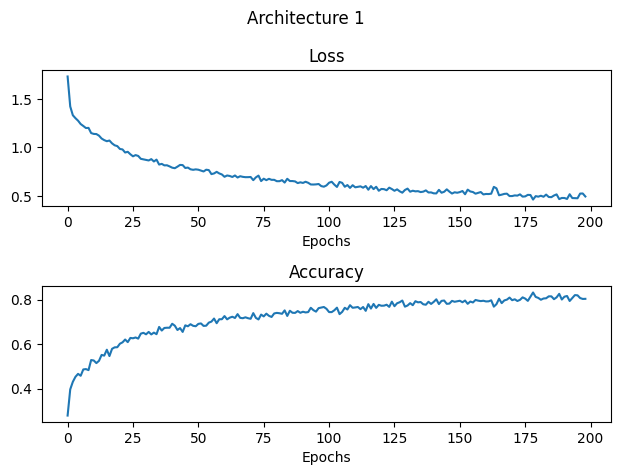

In [179]:
with open("./logs/hist_cvrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 1")
plt.tight_layout()
plt.savefig("cv-architecture1.png")

In [139]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 3ms/step
[[349  31  13  15   0]
 [ 88 379  20  20   3]
 [ 14   6 333  27   3]
 [  5   2  14 322   0]
 [  0   1   0   0 317]]


In [140]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8665


[0.3655305504798889, 0.866462767124176]

In [141]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 2ms/step - loss: 1.0983 - accuracy: 0.6029


[1.0983248949050903, 0.6028513312339783]

In [142]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 2ms/step
[[53 26  8 15  0]
 [51 47 14 11  4]
 [ 7  8 54 26  1]
 [ 4  2  9 67  4]
 [ 0  0  1  4 75]]


## RNN-Architecture2

In [143]:
rnn = load_model("./models/cv_rnn2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 32)            2304      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense (Dense)               (None, 5)                 85        
                                                                 
Total params: 3,173
Trainable params: 3,173
Non-trainable params: 0
_________________________________________________________________


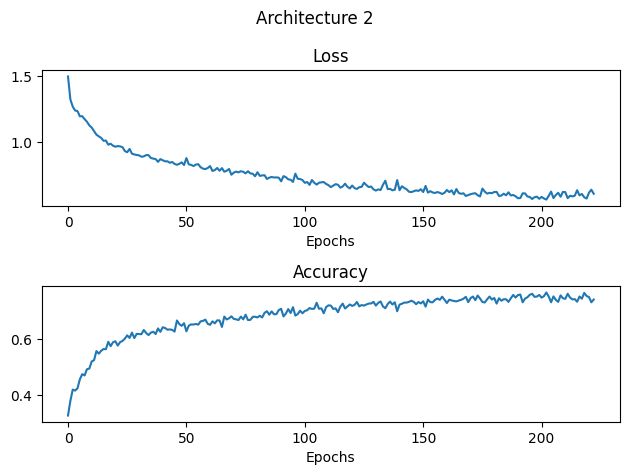

In [180]:
with open("./logs/hist_cvrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 2")
plt.tight_layout()
plt.savefig("cv-architecture2.png")

In [145]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 3ms/step
[[235 152   7  12   2]
 [106 373  24   4   3]
 [ 21  32 313   8   9]
 [  7   7   6 317   6]
 [  1   3   2   3 309]]


In [146]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7885


[0.5237526297569275, 0.7884811162948608]

In [147]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 3ms/step - loss: 0.8749 - accuracy: 0.6701


[0.8748807311058044, 0.6700611114501953]

In [148]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 3ms/step
[[41 51  4  6  0]
 [32 80  9  3  3]
 [ 8 17 61  7  3]
 [ 0  7  5 72  2]
 [ 0  0  3  2 75]]


## RNN-Architecture3

In [149]:
rnn = load_model("./models/cv_rnn3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 64)            6656      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645   

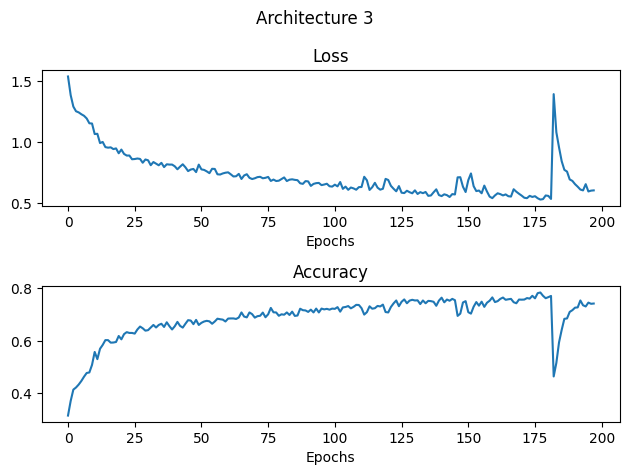

In [181]:
with open("./logs/hist_cvrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 3")
plt.tight_layout()
plt.savefig("cv-architecture3.png")

In [151]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 3ms/step
[[178 202   3  25   0]
 [ 79 397  19  11   4]
 [ 14  21 334  13   1]
 [  1   4  12 325   1]
 [  1   2   0   2 313]]


In [152]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7885


[0.46266964077949524, 0.7884811162948608]

In [153]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 3ms/step - loss: 0.8714 - accuracy: 0.6640


[0.8713637590408325, 0.6639510989189148]

In [154]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 3ms/step
[[33 53  4 12  0]
 [26 86  7  5  3]
 [12 14 62  6  2]
 [ 0  7  4 73  2]
 [ 0  3  3  2 72]]


## LSTM-Architecture1

In [155]:
rnn = load_model("./models/cv_lstm1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 64)                26624     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 26,949
Trainable params: 26,949
Non-trainable params: 0
_________________________________________________________________


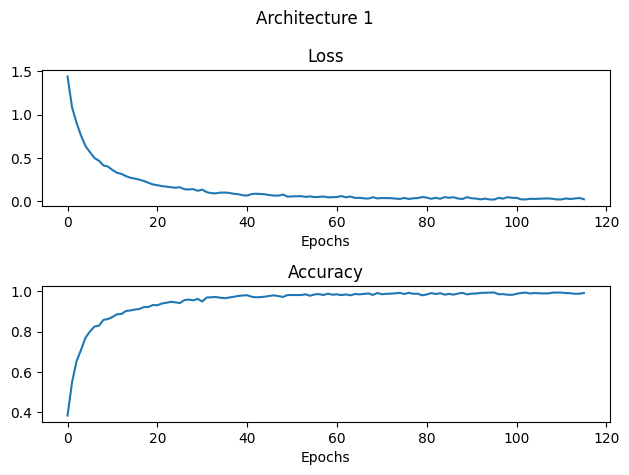

In [182]:
with open("./logs/hist_cvlstm1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 1")
plt.tight_layout()
plt.savefig("lstm-cv-architecture1.png")

In [157]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 1s 4ms/step
[[408   0   0   0   0]
 [  0 510   0   0   0]
 [  0   0 383   0   0]
 [  0   0   0 343   0]
 [  0   0   0   0 318]]


In [158]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 1.0000


[0.004421458579599857, 1.0]

In [159]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 4ms/step - loss: 0.8040 - accuracy: 0.8147


[0.8039793968200684, 0.8146639466285706]

In [160]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 4ms/step
[[89  9  0  4  0]
 [16 89 19  1  2]
 [ 2 13 76  3  2]
 [ 5  0  8 72  1]
 [ 0  0  4  2 74]]


## LSTM-Architecture2

In [161]:
rnn = load_model("./models/cv_lstm2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 79, 32)            9216      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 5)                 85        
                                                                 
Total params: 12,437
Trainable params: 12,437
Non-trainable params: 0
_________________________________________________________________


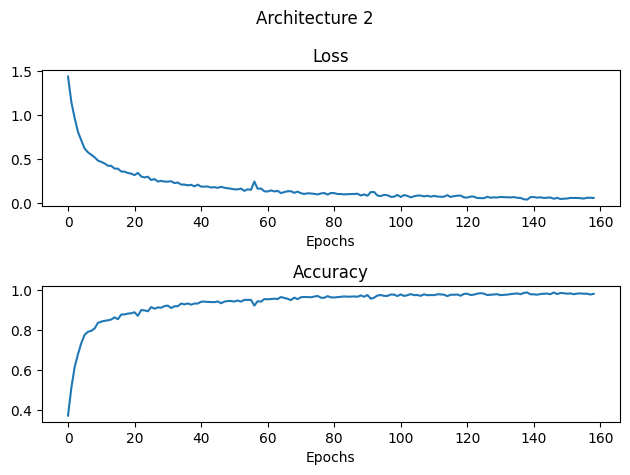

In [183]:
with open("./logs/hist_cvlstm2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 2")
plt.tight_layout()
plt.savefig("lstm-cv-architecture2.png")

In [163]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 1s 5ms/step
[[408   0   0   0   0]
 [  0 509   1   0   0]
 [  0   0 383   0   0]
 [  0   0   0 343   0]
 [  1   0   0   0 317]]


In [164]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 1s 7ms/step - loss: 0.0093 - accuracy: 0.9990


[0.009281083010137081, 0.9989806413650513]

In [165]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 5ms/step - loss: 0.8018 - accuracy: 0.8371


[0.8018213510513306, 0.837067186832428]

In [166]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 5ms/step
[[96  3  0  3  0]
 [12 92 18  2  3]
 [ 5 18 69  2  2]
 [ 3  0  3 79  1]
 [ 0  1  2  2 75]]


## LSTM-Architecture3

In [167]:
rnn = load_model("./models/cv_lstm3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 79, 64)            26624     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645   

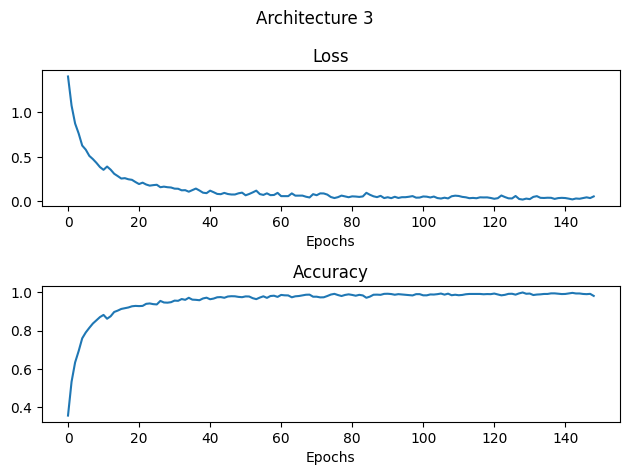

In [184]:
with open("./logs/hist_cvlstm3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.xlabel("Epochs")
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.suptitle("Architecture 3")
plt.tight_layout()
plt.savefig("lstm-cv-architecture3.png")

In [169]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 2s 8ms/step
[[408   0   0   0   0]
 [  0 506   4   0   0]
 [  0   0 383   0   0]
 [  0   0   0 343   0]
 [  0   0   0   0 318]]


In [170]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 1s 7ms/step - loss: 0.0067 - accuracy: 0.9980


[0.006700374651700258, 0.9979612827301025]

In [171]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 7ms/step - loss: 0.9299 - accuracy: 0.8554


[0.9298816919326782, 0.8553971648216248]

In [172]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 7ms/step
[[91  7  0  2  2]
 [ 9 92 21  2  3]
 [ 2  5 85  3  1]
 [ 4  0  6 74  2]
 [ 0  0  2  0 78]]
